# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files  # чтобы загружать файлы в облако через проводник

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload() #просто запускаем и выбираем файл в проводнике

Saving cars_moldova_no_dup.csv to cars_moldova_no_dup.csv


# Считываем файл в DataFrame



метод `.read_csv(path,delimiter)`

In [ ]:
df = pd.read_csv('/content/cars_moldova_no_dup.csv', delimiter = ',') # Открываем загруженный файл, через полный путь к файлу (с именем)
df # В этом блокноте мы работаем с данными без дубликатов

FileNotFoundError: [Errno 2] No such file or directory: '/content/cars_moldova_no_dup.csv'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_no_dup.csv', delimiter = ',')
df# можно считывать открытые файлы из интернета

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# EDA - Разведывательный анализ данных.

Цель разведывательного анализа данных - попытка предварительного понимания того, с чем вы имеете дело. Например, результатами анализа могут быть удаление аномалий, заполнение (удаление) пропусков, визуализация данных, выделение признаков или получение (или преобразование) новых признаков, удаление некоторых шумов, помех или других нерегулярных значений.


In [ ]:
df.info() # информация о данных в датафрейме: сколько строк, какие данные в столбцах, сколько пропущенных значений (Nan-values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [ ]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


# Анализ числовых признаков

Статистика по числовым данным

метод `.describe()`

In [ ]:
df.describe() # посчитает "стандартные" статистические параметры для числовых данных
# если данные с типом отличных от числовых - то они проигнорируются

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,37264.000000,3.726400e+04,37264.000000,3.726400e+04
mean,2007.709264,4.758488e+05,1858.932535,9.569387e+03
std,8.295806,4.591520e+06,707.662731,5.283315e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,9.000000e+04,1499.000000,3.300000e+03
50%,2009.000000,1.700000e+05,1800.000000,6.490000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.179900e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

Гистограмма seaborn  `.histplot(data, x, bins)`

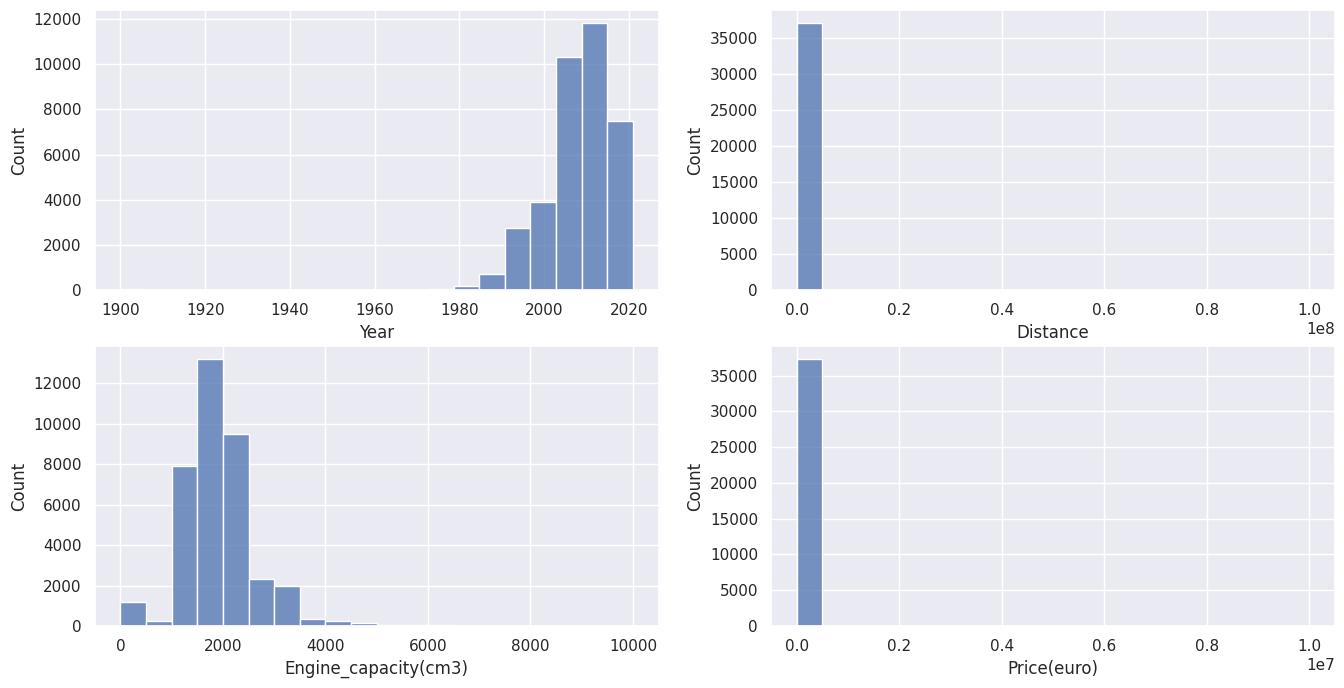

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем

Столбцы имеют явные аномалии, особенно `Distance` и `Price(euro)`. Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

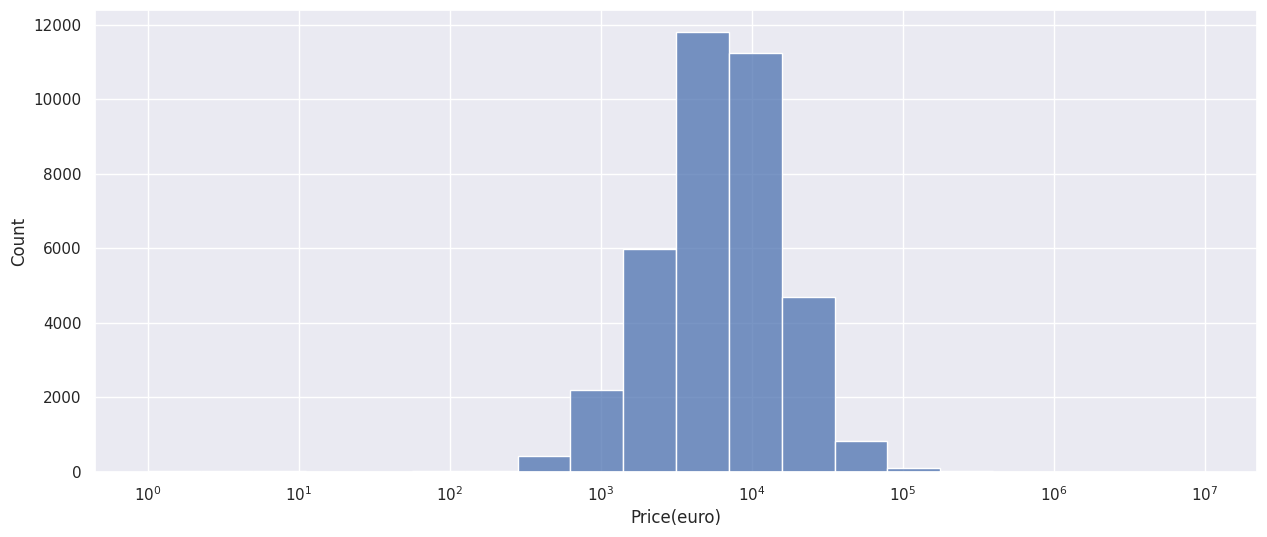

In [ ]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='Price(euro)', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

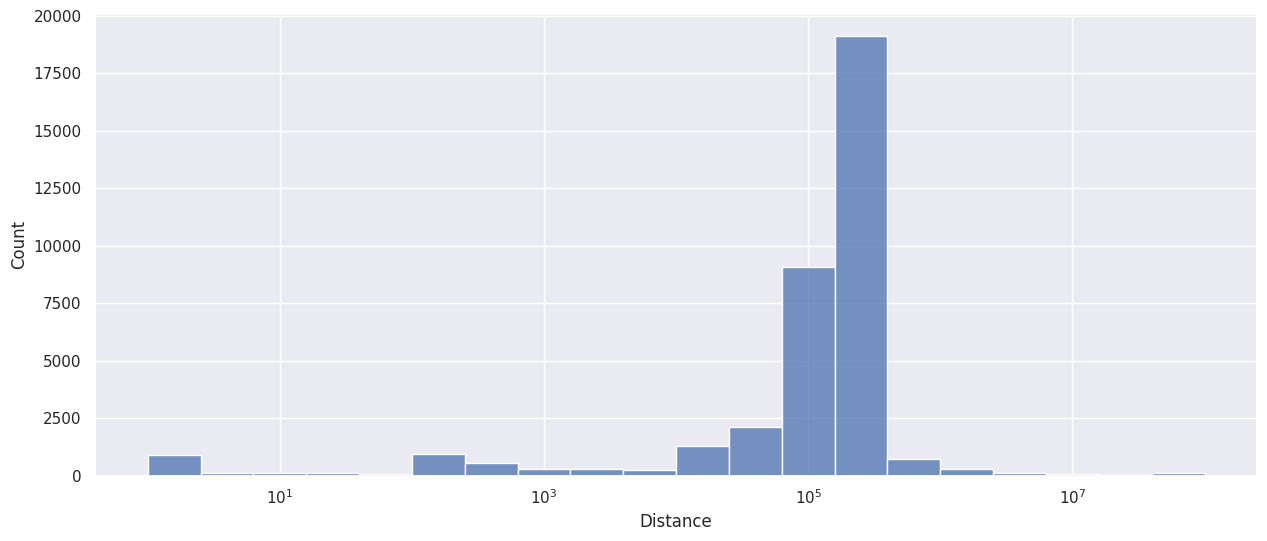

In [ ]:
# Удалим те объекты у которых Расстояние равно 0
question_dist = df[df.Distance == 0] # через логическое индексирование определяем проблемные данные
df = df.drop(question_dist.index) # удаляем данные по проблемным индексам

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Distance',
        bins = 20,
        log_scale = True);

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы.

Также, так как задача хорошо интерпретируема мы можем почистить столбцы пользуясь здравым смыслом.

Например, мы можем удалить записи, где цена меньше 100 евро или пробег меньше 1000 км и год старый.

In [ ]:
# здравый смысл
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
df.tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
32529,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
32530,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
32531,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
32532,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0
32533,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0


In [ ]:
df.info() # проверяем сколько строк осталось после удаления проблемных данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


Посмотрим на результат

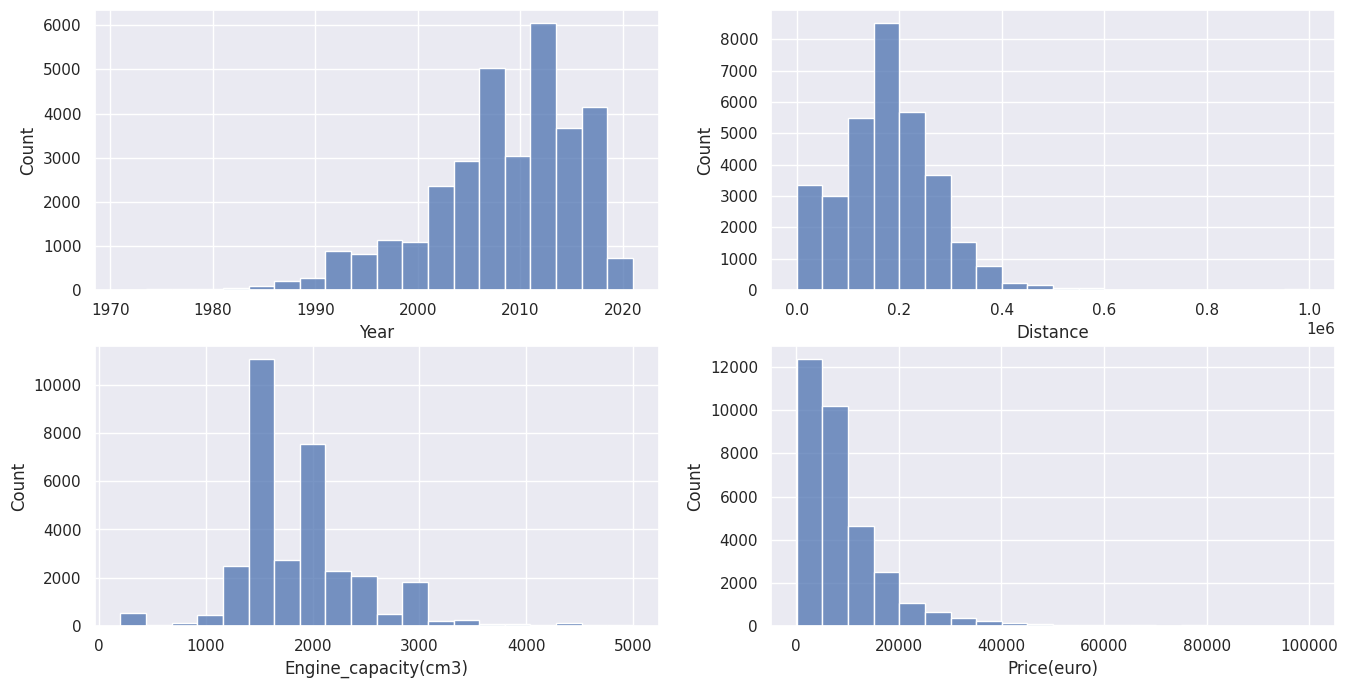

In [ ]:
# аналогично рассмотреному выше примеру, только уже без проблемных данных
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

**Зависимости параметров друг от друга**

pairplot seaborn
`.pairplot(data, hue, palette)`

по диагонали - гистограммы распределения отдельных признаков

другие элементы - скатерограммы

Важно!
Если признаков много (больше 5-10) то будет отрисовывать очень долго.
Поэтому предварительно разбиваем на подгруппы

[Перечень цветовых карт ](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

<Figure size 1500x1500 with 0 Axes>

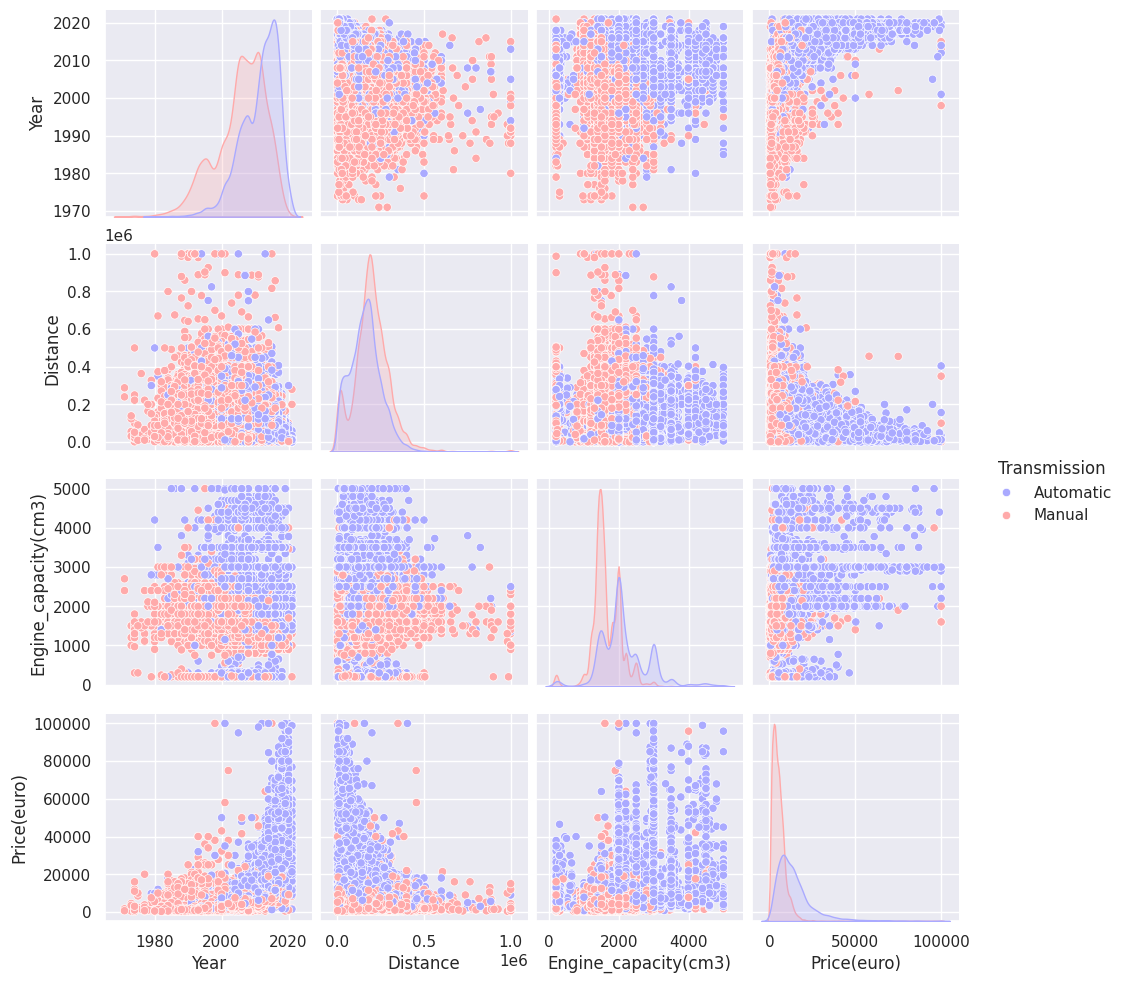

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,  # какой датафрей используем
             hue ='Transmission', # какую переменную используем для подкрашиваиния данных.
                                # Рекомендуется использовать Категориальные данные (не очень много уникальных значений)
             palette = 'bwr',); # какую цветовую карту используем. Здесь у нас всего 2 варианта, то мы используем bwr - один из Diverging
                                # если категорий больше, то лучше использовать что-то из Qualitative

## Предварительная Обработка

## **Нормализация**

In [ ]:
DF_norm  = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
Xmin = df[num_columns].min() # находим минимум (для каждого числового признака)
Xmax = df[num_columns].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

Распределение исходных данных

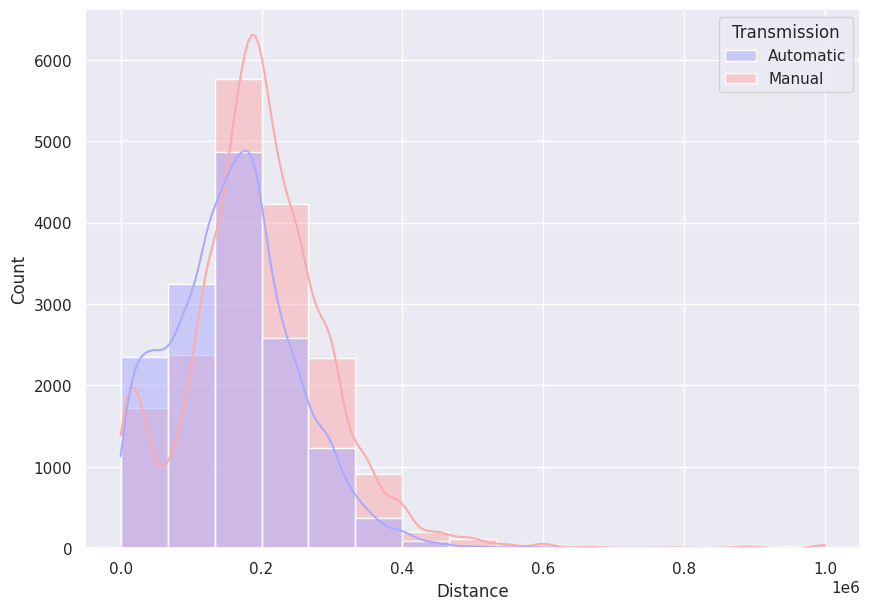

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df, # какой датафрейм используем
             x = 'Distance', # какую переменную отрисовываем
             hue = 'Transmission', # какую переменную используем для подкрашиваиния данных.
             bins = 15, # на сколько ячеек разбиваем
             kde = True, # чтобы отрисовал оценку плотности распределения
             palette='bwr'); # какую цветовую карту используем.

Распределение данных после нормализации

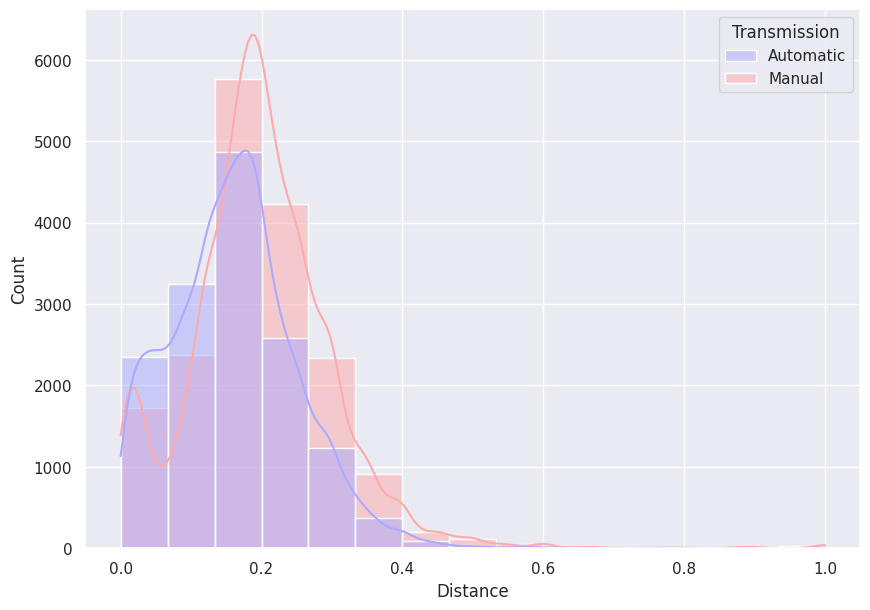

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr');

## **Стандартизация**

In [ ]:
DF_scaled = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
M = df[num_columns].mean() # находим среднее (для каждого числового признака)
STD = df[num_columns].std() # находим стандартное отклонение (для каждого числового признака)
DF_scaled[num_columns] = (df[num_columns]-M)/STD # реализуем стандартизацию. матричные операции работают

Распределение данных после стандартизации

<Axes: xlabel='Distance', ylabel='Count'>

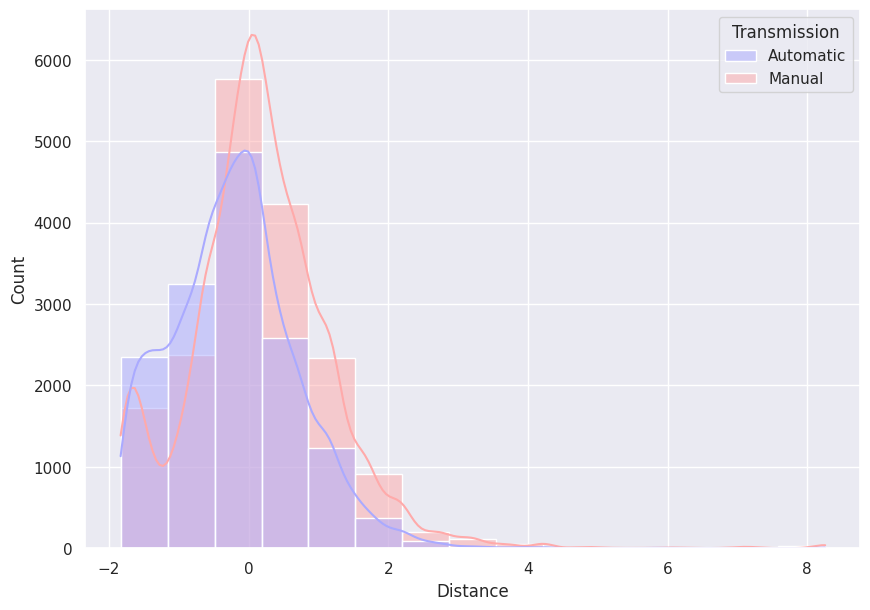

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

## **Нелинейное преобразование**



Сначала логарифмирование, потом стандартизация

In [ ]:
DF_power  = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
DF_power[num_columns] = np.log(DF_power[num_columns]) # натуральный логарифм применится ко всем  столбцам, которые мы укажем
# ниже как при стандартизации
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

Распределение исходных данных

<Axes: xlabel='Price(euro)', ylabel='Count'>

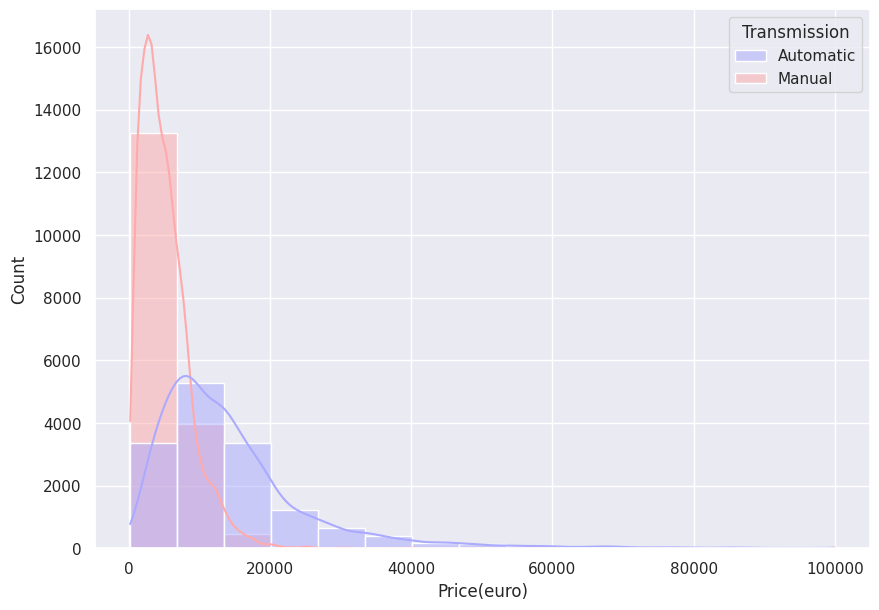

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')


Распределение данных после лагорифмирования и стандартизации

<Axes: xlabel='Price(euro)', ylabel='Count'>

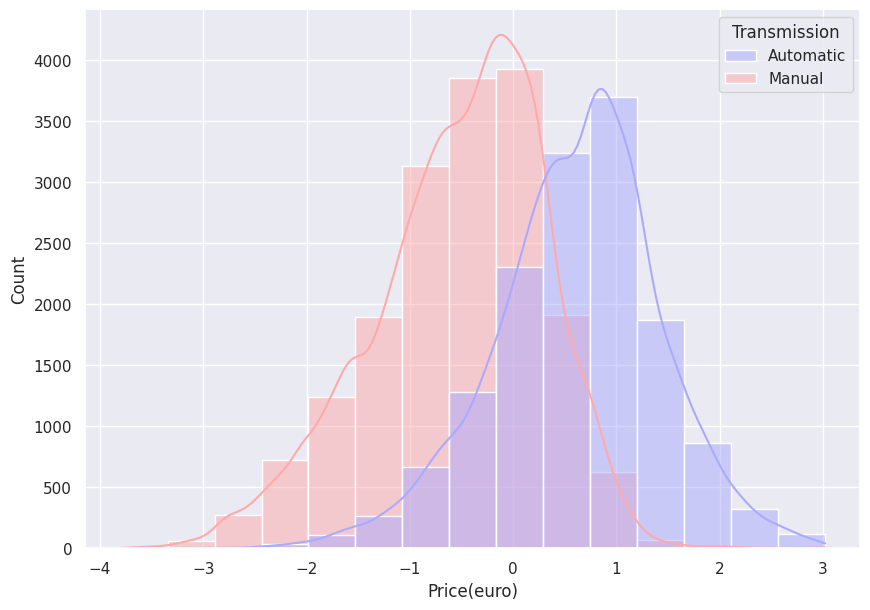

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')


График зависимости исходных данных от преобразованных

Чтобы понять, "что как менялось"

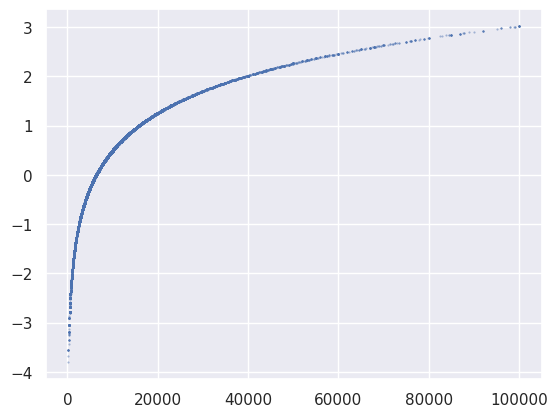

In [ ]:
plt.plot(df['Price(euro)'], # что по горизонтальной оси
         DF_power['Price(euro)'], # что по вертикальной оси
         '.', # чтобы не было линий. Только точки
         alpha = 0.5,  # прозрачность
         markersize = 1) # размер точек

## Добавление колонки
Зная суть или модель данных, мы можем предположить, чего нам не хватает - то есть попробовать добавить новый признак в данные. Такую операцию можно провести по-разному. В данном случае мы сделаем это исходя из логики. Введем признак пробег в год.



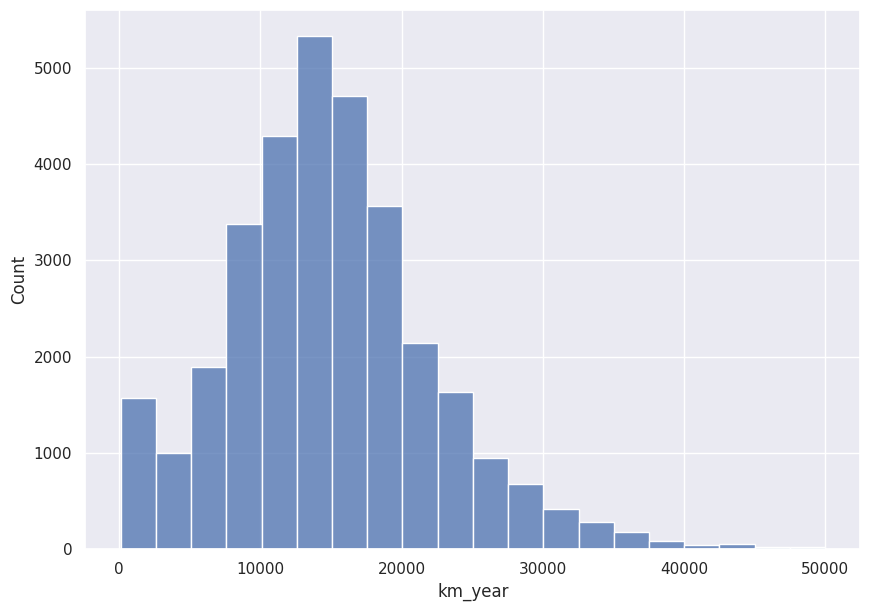

In [ ]:
df['Age'] = 2022 - df.Year # новый столбец как Константа минус старый

df['km_year'] = df.Distance/df.Age # делим один столбец на другой
#удалим дополнительно еще некоторые очень высокие значения
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
#удалим дополнительно еще некоторые очень низкие значения
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

# визуализируем результат
plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

Отметим, что важно, чтобы новый признак был независим от других - иначе его потом придется удалить.
Скатерограмма seaborn `.scatterplot(data, x, y, hue, size, alpha, palette)`

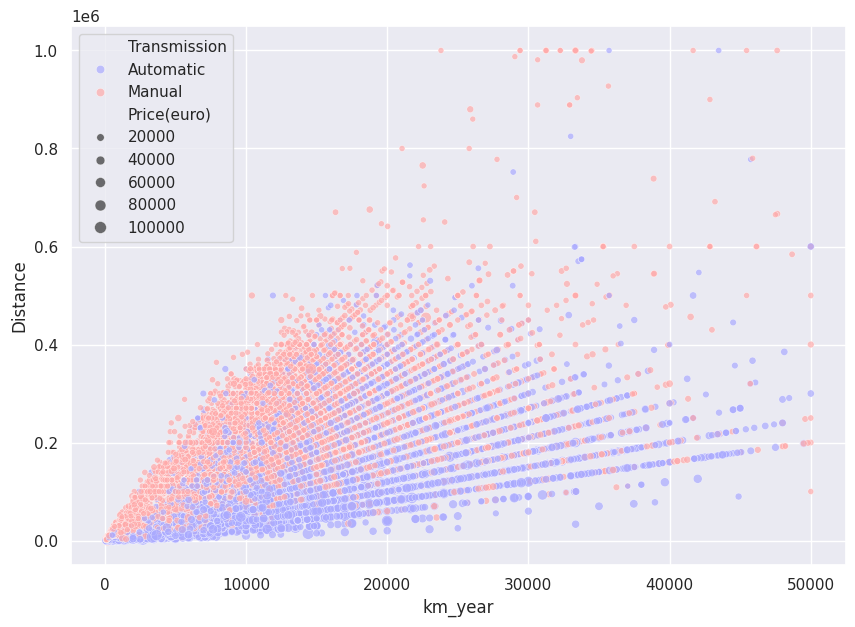

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df, # какой датафрейм используем
    x="km_year", # какую переменную используем для горизонтальной оси
    y="Distance",# какую переменную используем для вертикальной оси
    hue="Transmission", # какую переменную используем для подкрашиваиния данных.
    size = "Price(euro)", # какую переменную используем для задания размера
    alpha = 0.7, # прозрачность
             palette='bwr' # какую цветовую карту используем.
    );

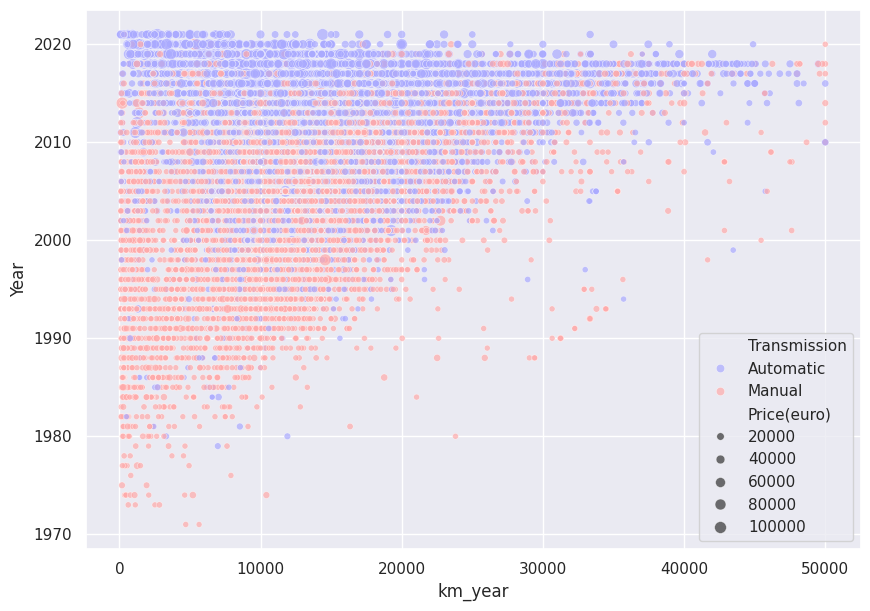

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Year",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

мини-вывод

Зависимость не совсем линейная, а значит признак может быть полезным

## Удаление аномалий и связанных признаков.
Часто проведенного выше анализа данных бывает недостаточно. Помимо всего выше изложенного бывает необходимо удаление аномалий из данных.

In [ ]:
num_columns.append('km_year') # добавили в список числовых данных название новой колонки - чтобы не забыть
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

Посмотрим на аномалии с использованием т.н. boxplot (ящик с усами)

Boxplot seaborn  `.boxplot(data, x)`



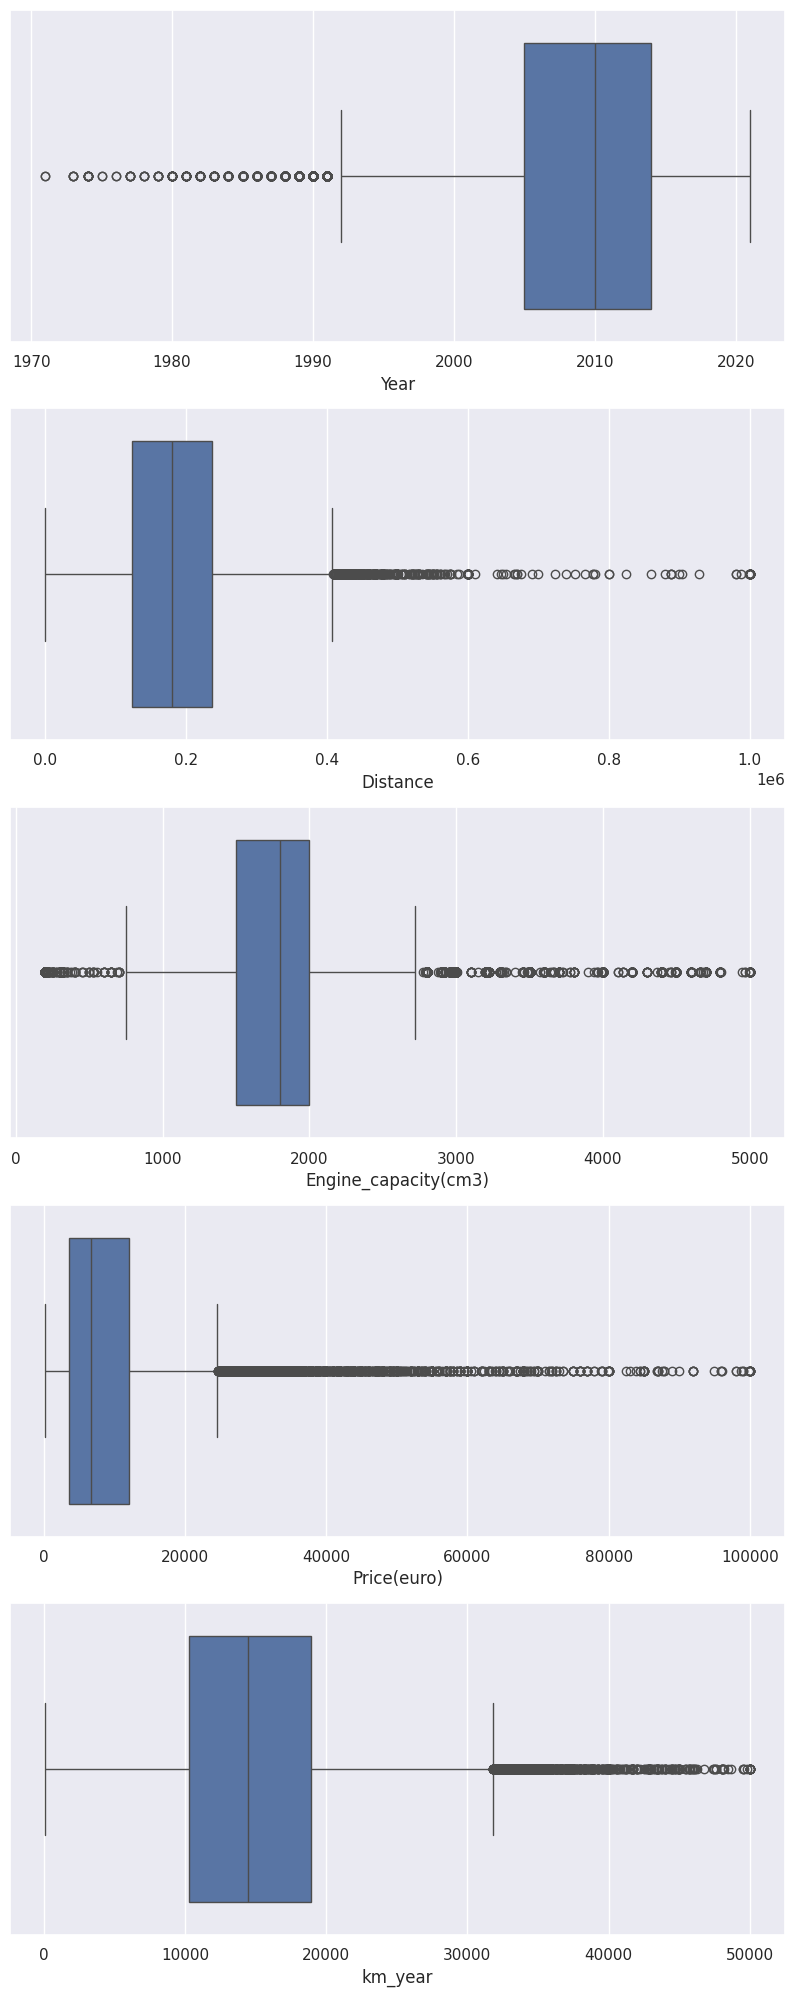

In [ ]:
# Тут как в примере про гистограммы. Но на этот раз рисуем не в рамках сетки 2 на 2, а в рамках сетки 5 на 1
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df, # какой датафрейм используем
            x=column_name); # какую переменную используем

Можно, по хорошему еще поудалять данных

### Корреляция числовых признаков

Посмотрим на корреляцию числовых столбцов

`.corr()` для получения матрицы корреляции из датафрейма (нечисловые признаки будут проигнорированы)

`.style.background_gradient(cmap, vmin, vmax)` чтобы подсветить красиво таблицу

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

df[num_columns].corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,Year,Distance,Engine_capacity(cm3),Price(euro),km_year
Year,1.000000,-0.434240,-0.025886,0.551517,0.425819
Distance,-0.434240,1.000000,0.067473,-0.347328,0.462784
Engine_capacity(cm3),-0.025886,0.067473,1.000000,0.382841,-0.010412
Price(euro),0.551517,-0.347328,0.382841,1.000000,0.156816
km_year,0.425819,0.462784,-0.010412,0.156816,1.000000


Больше вариантов [цветовых стилей seaborn](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

# Категориальные данные
посмотрим на число повторений результата в каждом категориальном признаке

метод `.nunique()`

In [ ]:
df[cat_columns].nunique()   # возврашает Серию.
                            #В роли индексов - название столюцов
                            #значения - количество уникальных значений в столбце

Make             78
Model           777
Style            12
Fuel_type         6
Transmission      2
dtype: int64

Оказалось, что часть из наших признаков имеют слишком много записей. Вероятно, редкие из них можно исключить без потери точности. Мы сделаем эту операцию объявив такие записи одним типом - rare.

Считаем сколько раз каждое значение категории встретчается методом

`.value_counts()`

In [ ]:
counts = df.Make.value_counts() # сначала посмотрим на столбец Make

counts  # опять Серия.
        #В роли Индексов - уникальное значение столбца
        #В роли значений  - сколько раз это значение встречается

Make
Volkswagen    3423
Toyota        3083
Mercedes      3015
BMW           2594
Renault       2346
              ... 
Abarth           1
Zotye            1
Tata             1
Saturn           1
Pontiac          1
Name: count, Length: 78, dtype: int64

In [ ]:
counts.median() # оцениваем медиану встречаемости разных признаков

32.5

In [ ]:
counts[counts<100] # посмотрим на марки которые встречаются реже чем 100 раз

Make
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Lincoln             49
Dodge               49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu            25
UAZ                 21
Chery               18
Great Wall          17
Lancia              17
Cadillac            16
Saab                15
Acura               14
Byd                 14
Brilliance          14
Alta marca          13
Zaz                 13
Lifan               10
Lada                 9
Isuzu                6
LuAZ                 5
GMC                  5
Buick                5
Ravon                5
Maserati             4
Geely                3
Haima                3
Scion                3
Hummer               3
Tesla                3
Datsun               3
Faw                  2
Mercedes-Maybach     2
ARO                  2
Groz  

In [ ]:
rare =  counts[(counts.values < 25)] # находим все редкие категории
df['Make'] = df['Make'].replace(rare.index.values, 'Rare') # заменим все редкие значения на "Rare"
                                # берем индексы, потому что в индексах rare скрыты редкие значения
                                # применяем values чтобы получился массив numpy
df.Make.value_counts() # пересчитаем сколько кого осталось

Make
Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihat

Аналогичные действия, но для столбца `Model`

Считаем встречаемость отдельных моделей

In [ ]:
counts = df.Model.value_counts()

counts

Model
E Class     1092
5 Series    1035
Passat       861
Megane       804
Astra        791
            ... 
Odyssey        1
Blazer         1
GW Peri        1
4007           1
Siber          1
Name: count, Length: 777, dtype: int64

Оцениваем медиану

In [ ]:
counts.median()

9.0

In [ ]:
counts[counts<100]

Model
Clio       97
X-Trail    93
Combo      88
Juke       88
A Class    87
           ..
Odyssey     1
Blazer      1
GW Peri     1
4007        1
Siber       1
Name: count, Length: 704, dtype: int64

Заменяем редкие

In [ ]:
counts = df.Model.value_counts()
rare =  counts[(counts.values <  50)]
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
df.Model.value_counts()

Model
Rare             6608
E Class          1092
5 Series         1035
Passat            861
Megane            804
                 ... 
Urban Cruiser      52
GLC                52
Accent             51
Matrix             50
S60                50
Name: count, Length: 136, dtype: int64

**Сохранение DataFrame в файл**


Метод `.to_csv(path, index) `

In [ ]:
df.to_csv('/content/cars_moldova_clean.csv',index=False)

## Приведение категориальных признаков к численным

### Бинарные признаки

Если вариантов не много - то можно "вручную" прописать

и использованием метода `.map()`

In [ ]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})# в данном случае задаем словарь
# где key (ключ) - исходное значение, value (значение) - на что конкретный ключ будет заменен

### Кодирование многозначных признаков

Альтернативно можно перевести в тип данных категориальный и потом провести кодирование

In [ ]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category') # задаем тип

for _, column_name in enumerate(cat_columns): # перебираем все колонки
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info() # по типам данных видно что пропали Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int16(1), int64(2), int8(4)
memory usage: 1.7 MB


Так же замечаем, что теперь наш датафрейм занимет меньше места

In [ ]:
df_se.head() #действительно одни цифры

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000
4,23,126,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636


А поскольку теперь категориалнье признаки выражены в числах, то теперь их можно в т.ч. визуализировать

In [ ]:
sns.pairplot(data = df_se, hue ='Transmission');

This cell output is too large and can only be displayed while logged in.


### One-hot кодирование многозначных признаков

Реализация от Pandas - через метод `.get_dummies()`

Применяем к оригинальному датафрейму

Важно - он будет ориентироваться на тип данных

С числовыми признаками он ничего делать не будет


In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
32215,2016,88000.0,1800.0,1,11500.0,6,14666.666667,False,False,False,...,False,False,True,False,False,False,False,False,True,False
32216,2002,225000.0,1800.0,0,4400.0,20,11250.000000,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32217,2015,89000.0,1500.0,0,7000.0,7,12714.285714,False,False,False,...,False,False,False,True,True,False,False,False,False,False
32218,2006,370000.0,2000.0,0,4000.0,16,23125.000000,False,False,False,...,False,False,False,False,True,False,False,False,False,False
32219,2006,300000.0,1500.0,0,4000.0,16,18750.000000,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Данных стало больше

In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 205 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: bool(198), float64(4), int64(3)
memory usage: 7.8 MB


# **Сохранение DataFrame в файл**

Метод `.to_csv(path, index) `

Отдельно сохраним простое Кодирование категориальных данных и one-hot кодирование

In [ ]:
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)

# Различные примеры визуализаций

### sns.displot()

гистограммо-подобное

 `.displot(data, x, y, kind,...)`

на базе  `sns.histplot()` , `sns.kdeplot()` и`sns.ecdfplot()`


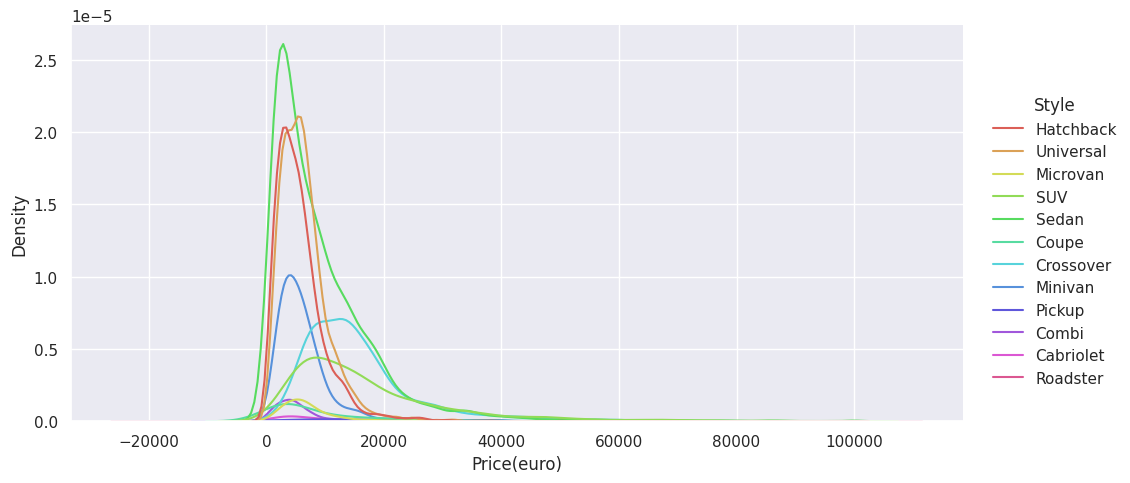

In [ ]:
#@title Одномерный случай{ run: "auto" }
#@markdown ### Тип графиков
kind = "kde" #@param[ "hist" , "kde"] {type:"string"}


sns.displot(data = df,     # какой датафрейм используем
             x = "Price(euro)", # какую переменную отрисовываем

            hue='Style',  # какую переменную используем для подкрашиваиния данных.
            kind = kind,   # какой график рисуем

              palette=sns.color_palette("hls", 12), # какую цветовую карту используем.
            aspect=2, # соотношение длины/высоты
             );

**Важно**: количество цветов в цветовой карте должно совпадать с уникальными значениями в соответсвующей колонке

### Двумерная вариация

Если нас интересует совместное распределение двух числовых признаков

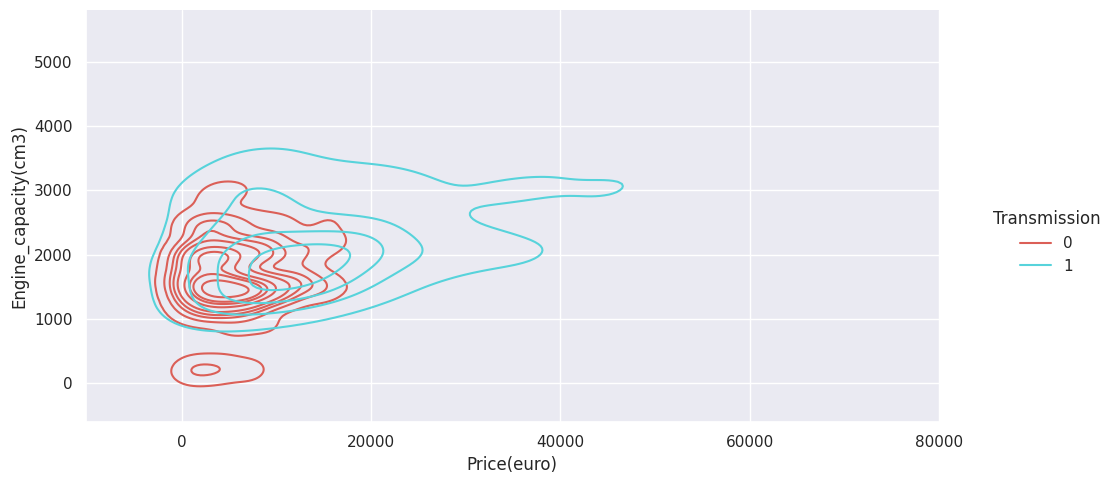

In [ ]:
#@title Двумерный случай{ run: "auto" }
#@markdown ### Тип графиков
kind = "kde" #@param[ "hist" , "kde"] {type:"string"}


sns.displot(data = df.sample(1000),     # какой датафрейм используем
             x = 'Price(euro)', # какую переменную отрисовываем
            y = "Engine_capacity(cm3)", # какую переменную отрисовываем

            hue='Transmission',  # какую переменную используем для подкрашиваиния данных.
            kind = kind,   # какой график рисуем

              palette=sns.color_palette("hls",2), # какую цветовую карту используем.
            aspect=2, # соотношение длины/высоты
             );

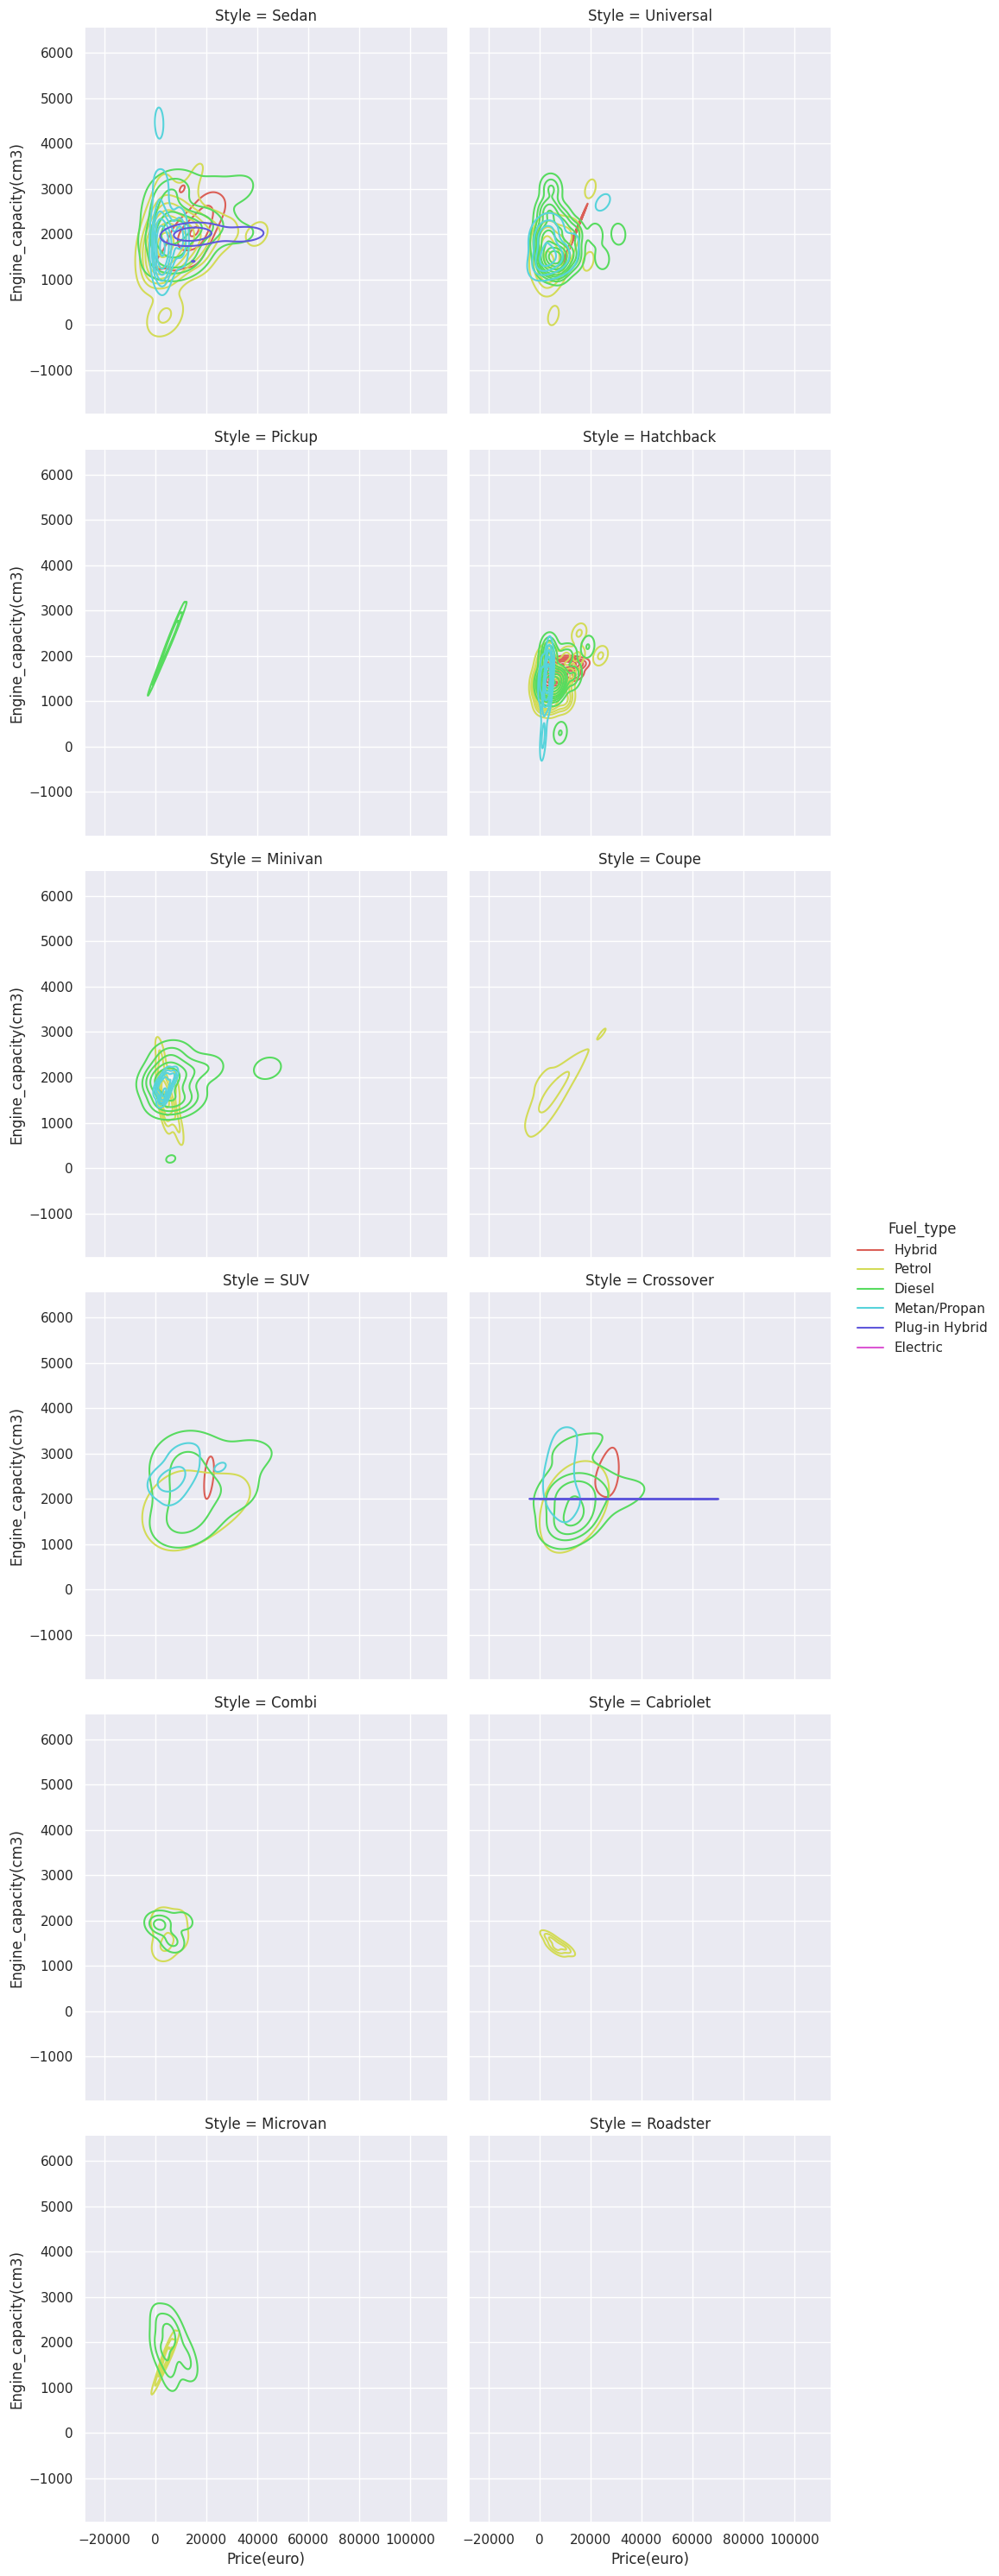

In [ ]:
#@title Разный график для разных категорий{ run: "auto" }
#@markdown ### Тип графиков
kind = "kde" #@param[ "hist" , "kde"] {type:"string"}


sns.displot(data = df.sample(1000),     # какой датафрейм используем
             x = 'Price(euro)', # какую переменную отрисовываем
            y = 'Engine_capacity(cm3)', # какую переменную отрисовываем

            hue='Fuel_type',  # какую переменную используем для подкрашиваиния данных.
            kind = kind,   # какой график рисуем
            col = 'Style',
              palette=sns.color_palette("hls", 6), # какую цветовую карту используем.
            aspect=1, # соотношение длины/высоты
            warn_singular=False,
            col_wrap = 2,
             );

### sns.relplot()

Скатерограмма / Линейный график

`.relplot(data, x, y, hue, size, alpha, palette)`

на базе `sns.scatterplot()` и `sns.lineplot()`

Полезны для исследования зависимостей двух числовых признаков

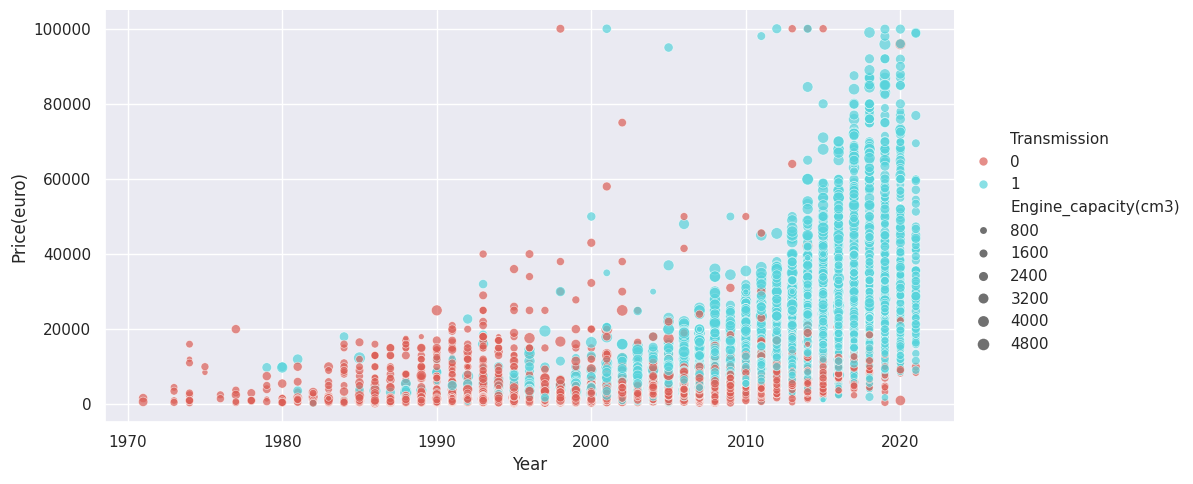

In [ ]:
#@title { run: "auto" }
#@markdown ### Тип графиков
kind = "scatter" #@param[ "line" , "scatter"] {type:"string"}

sns.relplot(x='Year',        # какую переменную используем для горизонтальной оси
                y='Price(euro)',        # какую переменную используем для вертикальной оси
                data=df,            # какой датафрейм используем
            kind = kind,   # какой график рисуем
            hue = 'Transmission',      # какую переменную используем для подкрашиваиния данных.
                alpha=0.7,          # прозрачность
                size = "Engine_capacity(cm3)" ,  # какую переменную используем для задания размера
        palette=sns.color_palette("hls", 2),# какую цветовую карту используем.
            aspect=2, # соотношение длины/высоты
             );

### sns.catplot()

`sns.boxplot()`, `sns.violinplot()`, `sns.boxenplot()`, `stripplot()`, `sns.swarmplot()`, `sns.pointplot()`, `sns.barplot()` и `sns.countplot()`.

Разные графики имеют смысл для разных случаев

Полезны когда ищется связь между числовым признаком и категориальным

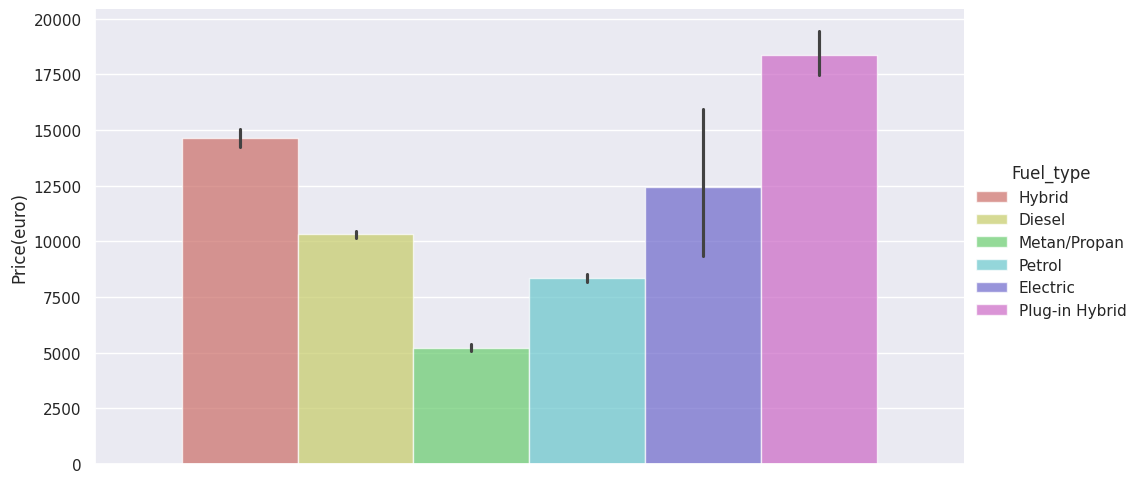

In [ ]:
#@title Одномерные вариации { run: "auto" }
#@markdown ### Тип графиков
kind = "bar" #@param[ "boxen" , "strip", "violin","swarm","count","point", "bar"] {type:"string"}

sns.catplot(y='Price(euro)',        # какую переменную используем для горизонтальной оси
                data=df,            # какой датафрейм используем
            kind = kind,   # какой график рисуем
            hue = 'Fuel_type',      # какую переменную используем для подкрашиваиния данных.
                alpha=0.7,          # прозрачность
        palette=sns.color_palette("hls", 6),# какую цветовую карту используем.
            aspect=2, # соотношение длины/высоты
             );

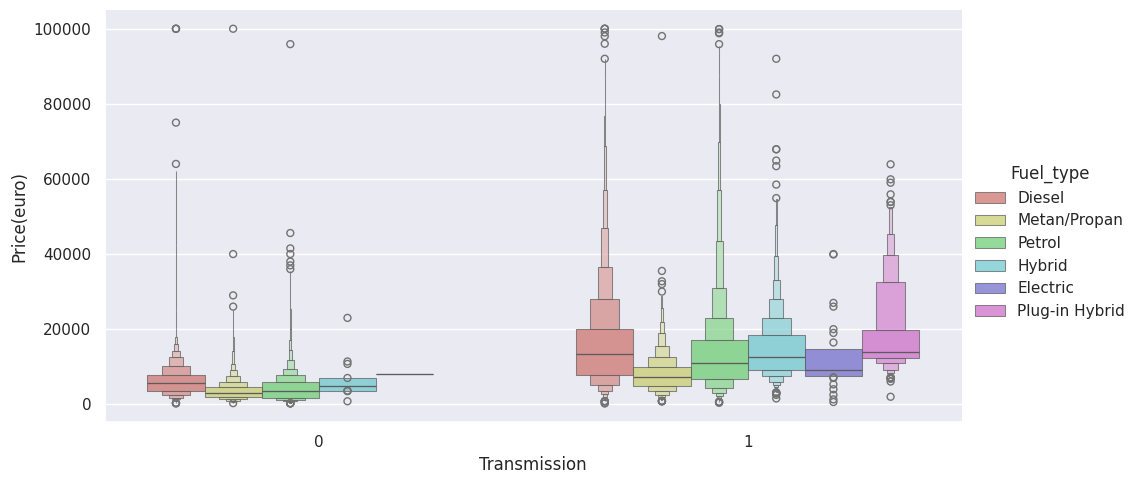

In [ ]:
#@title Двумерные вариации { run: "auto" }
#@markdown ### Тип графиков
kind = "boxen" #@param[ "boxen" , "strip", "violin","swarm","point", "bar"] {type:"string"}

sns.catplot(y='Price(euro)',        # какую переменную используем для горизонтальной оси
               x='Transmission',        # какую переменную используем для вертикальной оси
                data=df,            # какой датафрейм используем
            kind = kind,   # какой график рисуем
            hue = 'Fuel_type',      # какую переменную используем для подкрашиваиния данных.
                alpha=0.7,          # прозрачность
        palette=sns.color_palette("hls", 6),# какую цветовую карту используем.
            aspect=2, # соотношение длины/высоты

             );

## Гистограммы распределений (аналог)

рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

Другой способ рисовать гистограммы в seaborn  `.countplot(data, x)`

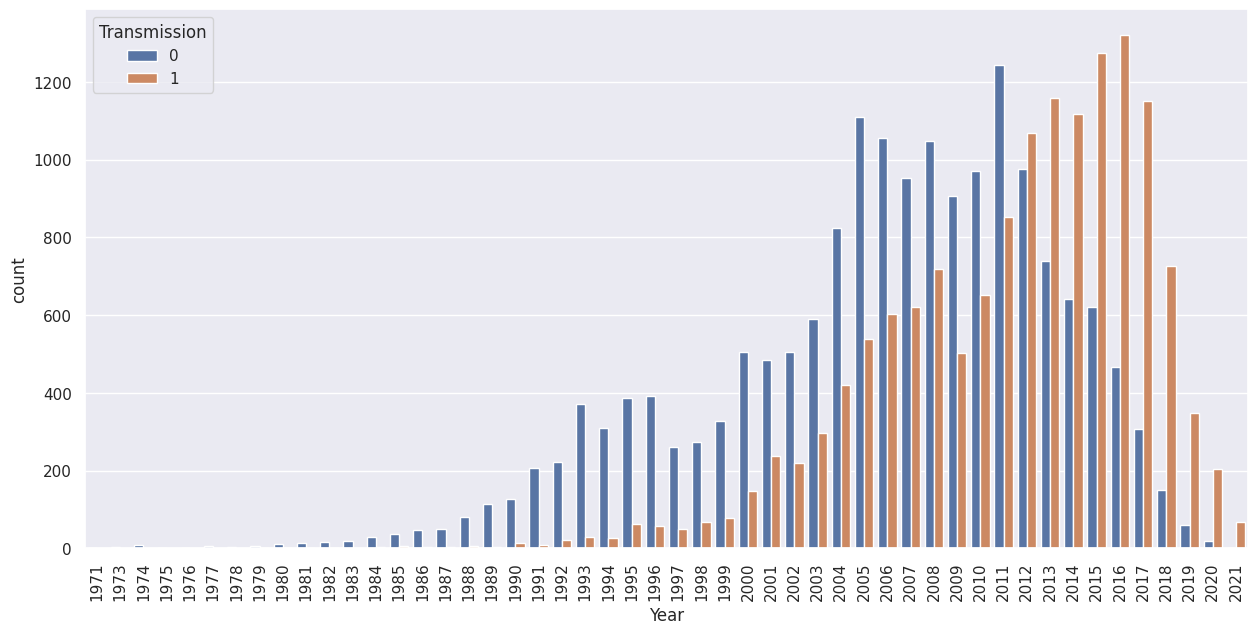

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 7))
sns.countplot(data=df, x="Year", hue="Transmission", ax=ax)
ax.tick_params(axis='x', rotation=90)